In [58]:
#Import the libraries
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.cluster import KMeans
import os

1.1 Basic x_train_df Overview


In [4]:
# Load the x_train_df
x_train_df = pd.read_csv('/home/zeynep/ORIS/x_train_df/X_train.csv')
y_train_df = pd.read_csv('/home/zeynep/ORIS/x_train_df/Y_train.csv')

In [5]:
# Show the first few rows of the x_train_dfset
print("First few rows of X_train_sampled.csv:")
print(x_train_df.head())

First few rows of X_train_sampled.csv:
               site_name  company_name  \
0       Carrières Daniel           NaN   
1         Malet Horgues.           NaN   
2          Carrieres Plo           NaN   
3  Dastugue Jean et Fils           NaN   
4  Pema Carrières Du Roc           NaN   

                                                link  latitude  longitude  \
0  https://www.google.com/maps/place/Carri%C3%A8r...   43.0477    -0.0473   
1  https://www.google.com/maps/place/Malet+Horgue...   43.1903     0.0916   
2  https://www.google.com/maps/place/Carrieres+Pl...   42.9605     0.3937   
3  https://www.google.com/maps/place/Dastugue+Jea...   43.0689     0.3865   
4  https://www.google.com/maps/place/Pema+Carri%C...   43.6493     0.3439   

                                             address homepage    phone  \
0                      Le Village, 65100 Ger, France      NaN  #ERROR!   
1             Chem. de Mansas, 65310 Horgues, France      NaN      NaN   
2                      

In [6]:
print("\nFirst few rows of Y_train_sampled.csv:")
print(y_train_df.head())


First few rows of Y_train_sampled.csv:
   output
0       1
1       1
2       0
3       0
4       0


In [7]:
# Check the x_train_df types of each column
print("\nx_train_df types in X_train_sampled.csv:")
print(x_train_df.dtypes)


Data types in X_train_sampled.csv:
site_name         object
company_name     float64
link              object
latitude         float64
longitude        float64
address           object
homepage          object
phone             object
sales_phone      float64
email            float64
sales_email      float64
opening_hours     object
site_type         object
id                object
image_path        object
dtype: object


In [9]:
print("\nDescriptive statistics for categorical columns:")
print(x_train_df.describe(include=['object']))


Descriptive statistics for categorical columns:
              site_name                                               link  \
count              1039                                               1039   
unique              959                                               1039   
top     EQIOM Granulats  https://www.google.com/maps/place/Triel+Granul...   
freq                  9                                                  1   

                                                address           homepage  \
count                                              1033                412   
unique                                             1018                243   
top     Rue du Berval, 60123 Bonneuil-en-Valois, France  cmne-materiaux.fr   
freq                                                  3                 15   

          phone opening_hours site_type                                    id  \
count       798           514      1039                                  1039   
unique 

Unique values count for each column:
site_name         959
company_name        0
link             1039
latitude         1022
longitude        1026
address          1018
homepage          243
phone               1
sales_phone         0
email               0
sales_email         0
opening_hours     292
site_type          10
id               1039
image_path       1039
quarry              2
cluster             5
dtype: int64

Number of duplicate rows: 0
Duplicated rows (IDs, Latitude, Longitude):
                                       id  latitude  longitude  \
127  f867911e-517a-4d2a-98be-fd3ee60a12a8   43.2639     5.4333   
175  2ba5f1a3-e82c-4ef6-bcc8-5643454ecafb   43.2639     5.4333   
557  179f0bb1-fb4b-4920-9884-c19d8e246531   47.2829     5.0165   
558  b88ab7fc-a481-4395-a651-ae87b3a1037a   47.2829     5.0165   

                                            image_path  
127  data/images/train/f867911e-517a-4d2a-98be-fd3e...  
175  data/images/train/2ba5f1a3-e82c-4ef6-bcc8-5643...  
5

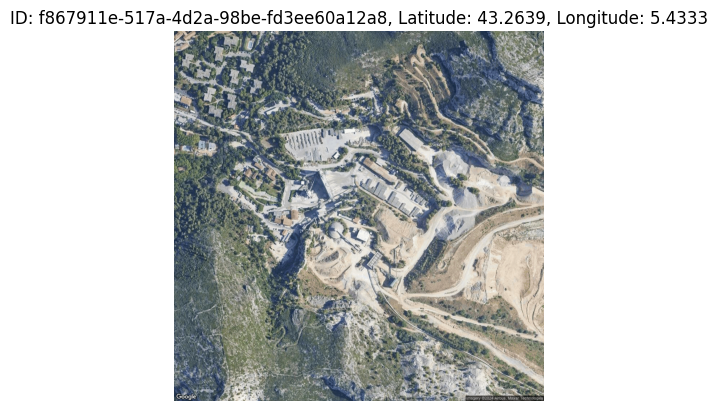

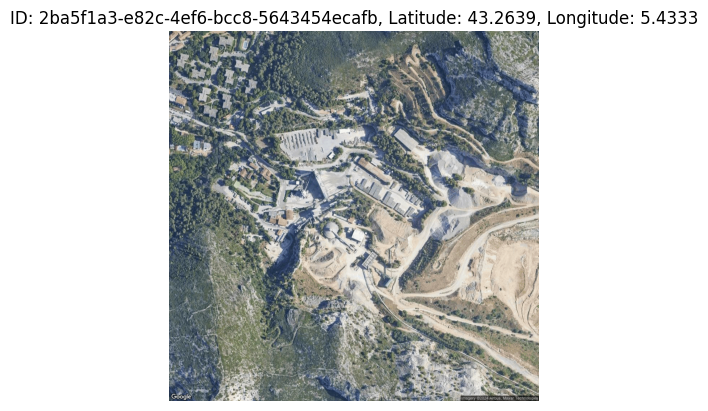

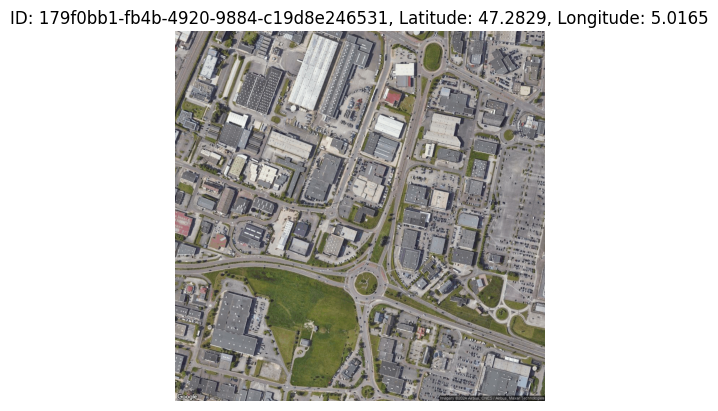

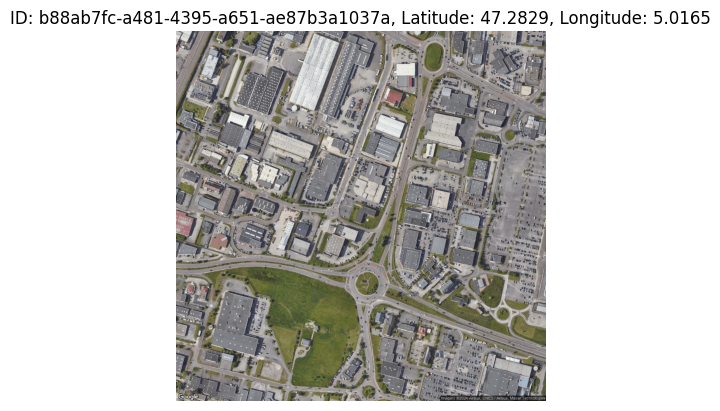

In [67]:
# 1. Count unique values for each column
unique_values_count = x_train_df.nunique()
print("Unique values count for each column:")
print(unique_values_count)

# 2. Check for duplicate rows in the dataset
duplicate_rows = x_train_df.duplicated()
print(f"\nNumber of duplicate rows: {duplicate_rows.sum()}")

# Check for rows with the same latitude and longitude (including original and duplicates)
duplicate_locations = x_train_df.duplicated(subset=['latitude', 'longitude'], keep=False)

# Extract IDs, latitude, and longitude for rows with duplicate latitude and longitude
duplicate_location_rows_with_ids = x_train_df[duplicate_locations][['id', 'latitude', 'longitude','image_path']]

# Print the duplicated IDs along with their latitude and longitude
print("Duplicated rows (IDs, Latitude, Longitude):")
print(duplicate_location_rows_with_ids)

# Iterate over the DataFrame containing duplicate locations, not the Series
for index, row in duplicate_location_rows_with_ids.iterrows():
    image_path = row['image_path']  # Get the image path
    image_id = os.path.basename(image_path)
    image_path = '/home/zeynep/ORIS_images/images/train'
    image_path = os.path.join(image_path,image_id) 
    
    # Try to load and display the image
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"ID: {row['id']}, Latitude: {row['latitude']}, Longitude: {row['longitude']}")
        plt.axis('off')  # Hide axis for a cleaner display
        plt.show()
    except FileNotFoundError:
        print(f"Image not found for ID: {row['id']} at {image_path}")


1.2 Target Variable Analysis


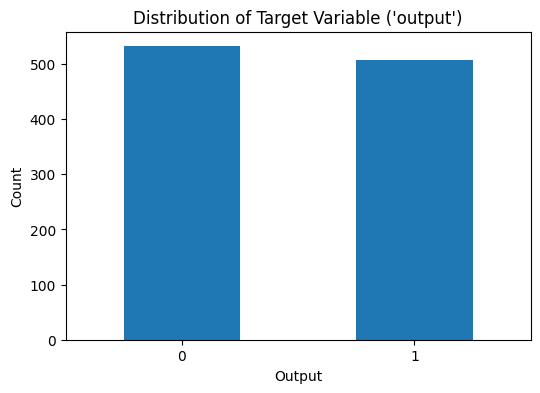

In [69]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6,4))
y_train_df['output'].value_counts().plot(kind='bar')

# Adding title and labels
plt.title("Distribution of Target Variable ('output')")
plt.xlabel("Output")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [11]:
# Percentage of each class
output_distribution = y_train_df['output'].value_counts(normalize=True) * 100
print(f"\nTarget distribution (%):\n{output_distribution}")


Target distribution (%):
output
0    51.20308
1    48.79692
Name: proportion, dtype: float64


1.3 Geospatial x_train_df Analysis

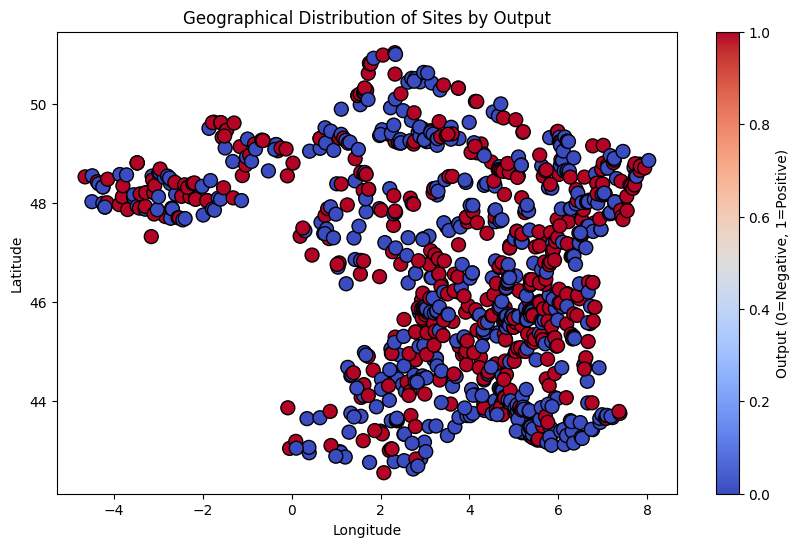

In [12]:
# Scatter plot of geographical x_train_df (latitude and longitude)
plt.figure(figsize=(10,6))
plt.scatter(x_train_df['longitude'], x_train_df['latitude'], c=y_train_df['output'], cmap='coolwarm', edgecolors='k', s=100)
plt.title("Geographical Distribution of Sites by Output")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Output (0=Negative, 1=Positive)')
plt.show()

1.4 Categorical Variable Analysis

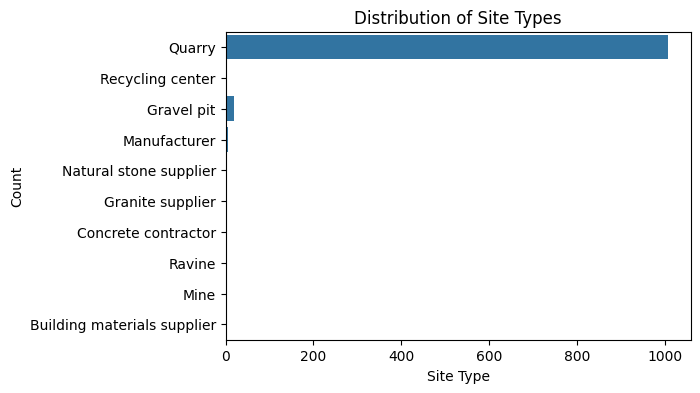

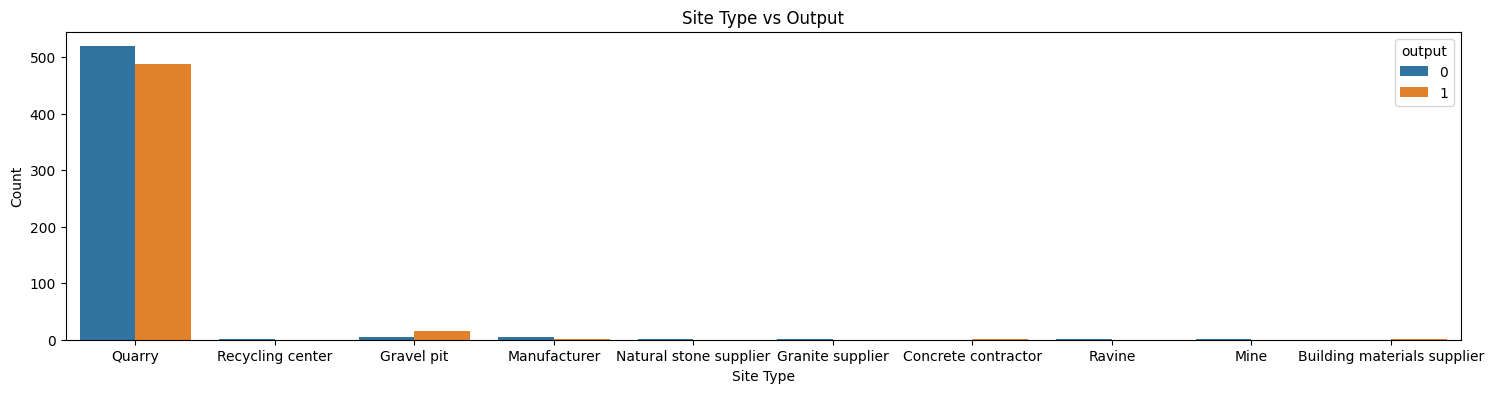

In [19]:
# Distribution of site_type
plt.figure(figsize=(6,4))
sns.countplot(x_train_df['site_type'])
plt.title("Distribution of Site Types")
plt.xlabel("Site Type")
plt.ylabel("Count")
plt.show()

# Relationship between site_type and target
plt.figure(figsize=(18,4))
sns.countplot(x='site_type', hue=y_train_df['output'], x_train_df=x_train_df)
plt.title("Site Type vs Output")
plt.xlabel("Site Type")
plt.ylabel("Count")
plt.show()


1.5 Handling Missing Values

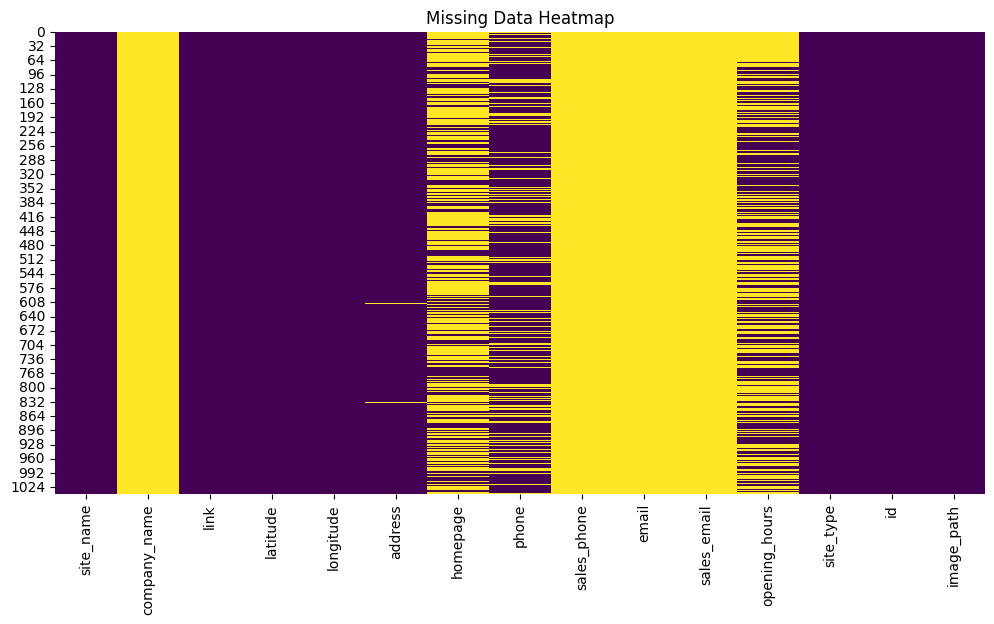

In [21]:
# Visualizing missing x_train_df
plt.figure(figsize=(12,6))
sns.heatmap(x_train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing x_train_df Heatmap")
plt.show()


1.6 Opening Hours Analysis

In [22]:
# Examine opening hours
x_train_df['opening_hours'] = x_train_df['opening_hours'].fillna('Unknown')

# Count unique patterns in the opening_hours column
print("\nUnique values in opening_hours column:")
print(x_train_df['opening_hours'].value_counts().head())


Unique values in opening_hours column:
opening_hours
Unknown                                                                                                                                                                                                                                                                                  525
{}                                                                                                                                                                                                                                                                                        64
{'Thursday': ['7:30a.m.–12p.m.', '1:30–5p.m.'], 'Friday': ['7:30a.m.–12p.m.', '1:30–4p.m.'], 'Saturday': ['Closed'], 'Sunday': ['Closed'], 'Monday': ['7:30a.m.–12p.m.', '1:30–5p.m.'], 'Tuesday': ['7:30a.m.–12p.m.', '1:30–5p.m.'], 'Wednesday': ['7:30a.m.–12p.m.', '1:30–5p.m.']}     21
{'Thursday': ['7:30a.m.–12p.m.', '1:30–5p.m.'], 'Friday': ['7:30a.m.–12p.m.', '1:30–5p.m.']

1.7 Heatmap of Quarry or Not Quarry Based on the Locations

/tmp/ipykernel_39896/4030798353.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=quarry_locations['longitude'], y=quarry_locations['latitude'],
/tmp/ipykernel_39896/4030798353.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=not_quarry_locations['longitude'], y=not_quarry_locations['latitude'],


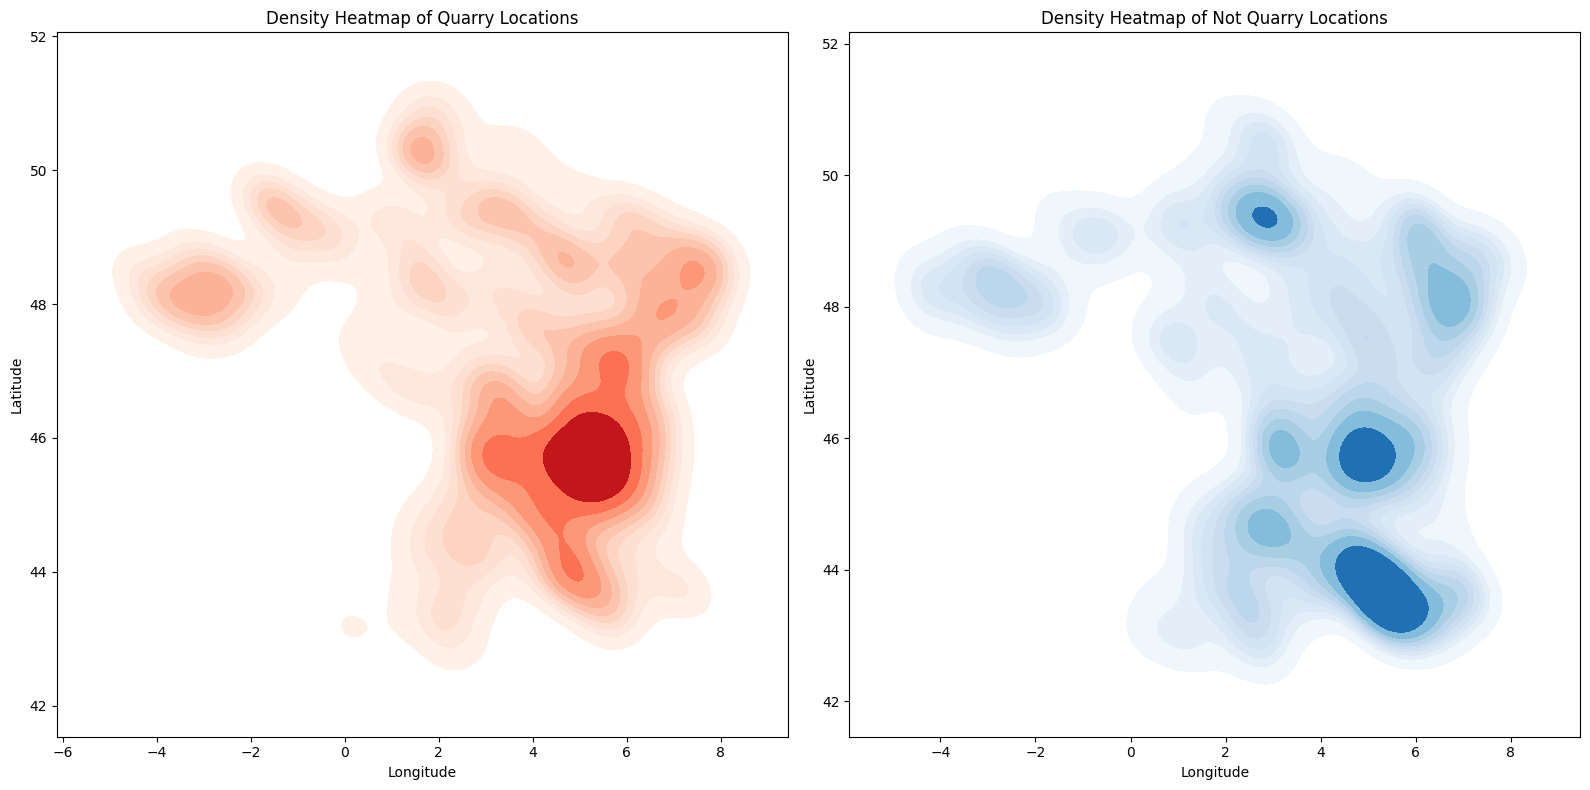

In [32]:
# Y_train'den 'quarry' bilgisini X_train'e ekleyelim
x_train_df['quarry'] = y_train_df['output']

# Quarry ve Not Quarry lokasyonlarını filtreleyelim
quarry_locations = x_train_df[x_train_df['quarry'] == 1]
not_quarry_locations = x_train_df[x_train_df['quarry'] == 0]

# Plotting heatmaps separately for Quarry and Not Quarry
plt.figure(figsize=(16, 8))

# First subplot for Quarry heatmap
plt.subplot(1, 2, 1)
sns.kdeplot(x=quarry_locations['longitude'], y=quarry_locations['latitude'], 
            cmap="Reds", shade=True, bw_adjust=0.5)
plt.title('Density Heatmap of Quarry Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Second subplot for Not Quarry heatmap
plt.subplot(1, 2, 2)
sns.kdeplot(x=not_quarry_locations['longitude'], y=not_quarry_locations['latitude'], 
            cmap="Blues", shade=True, bw_adjust=0.5)
plt.title('Density Heatmap of Not Quarry Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


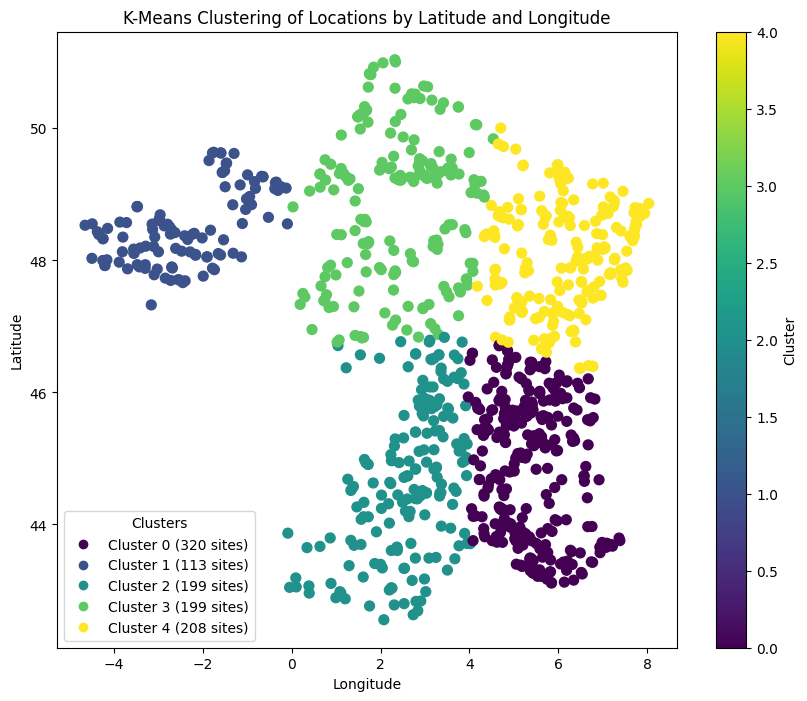

In [42]:



# Extract latitude and longitude for clustering
locations = x_train_df[['latitude', 'longitude']]

# Define the number of clusters (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans clustering model and assign clusters
x_train_df['cluster'] = kmeans.fit_predict(locations)

# Calculate the number of sites per cluster
cluster_counts = x_train_df['cluster'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_df['longitude'], x_train_df['latitude'], c=x_train_df['cluster'], cmap='viridis', s=50)

# Add the legend with the number of sites in each cluster
legend_labels = [f"Cluster {i} ({cluster_counts[i]} sites)" for i in range(len(cluster_counts))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

# Set titles and labels
plt.title("K-Means Clustering of Locations by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster')

# Display the plot
plt.show()


looking in details for eaach column site type

In [71]:
# Combine the x_train and y_train datasets
x_train_with_y = pd.concat([x_train_df, y_train_df], axis=1)

# Filter rows where 'site_type' is not 'Quarry' but 'output' is 1 (indicating quarry)
non_quarry_sites_with_quarry_label = x_train_with_y[(x_train_with_y['site_type'] != 'Quarry') & (x_train_with_y['output'] == 1)]

# Loop through and print each site_type and link
for index, row in non_quarry_sites_with_quarry_label.iterrows():
    print(f"Site Type: {row['site_type']}, Link: {row['link']}")


Site Type: Gravel pit, Link: https://www.google.com/maps/place/Carri%C3%A8re+de+Boulbon+-+Bronzo+Perasso/data=!4m7!3m6!1s0x12b5c3705a22af1d:0x9ed8a41fe9aa5032!8m2!3d43.8787049!4d4.6995097!16s%2Fg%2F11ry96m_84!19sChIJHa8iWnDDtRIRMlCq6R-k2J4?authuser=0&amp;hl=en&amp;rclk=1
Site Type: Gravel pit, Link: https://www.google.com/maps/place/Carri%C3%A8re+de+Zani%C3%A8re+COUDERT/data=!4m7!3m6!1s0x47f70f71c149d9a9:0x45b71b0da5c2986d!8m2!3d45.6439255!4d2.9666013!16s%2Fg%2F11qbtxnhd5!19sChIJqdlJwXEP90cRbZjCpQ0bt0U?authuser=0&amp;hl=en&amp;rclk=1
Site Type: Gravel pit, Link: https://www.google.com/maps/place/Quartz%26min%C3%A9raux/data=!4m7!3m6!1s0x47f689fa5267f23d:0xc3c6b5a11527397d!8m2!3d45.6122621!4d3.6278728!16s%2Fg%2F11j2chhh8p!19sChIJPfJnUvqJ9kcRfTknFaG1xsM?authuser=0&amp;hl=en&amp;rclk=1
Site Type: Gravel pit, Link: https://www.google.com/maps/place/Carri%C3%A8res+TREMA/data=!4m7!3m6!1s0x47f4210270746a03:0xeff5cc0d625a86e6!8m2!3d45.7992275!4d3.9162924!16s%2Fg%2F11pv3p4_w_!19sChIJA2p0cAIh9EcR

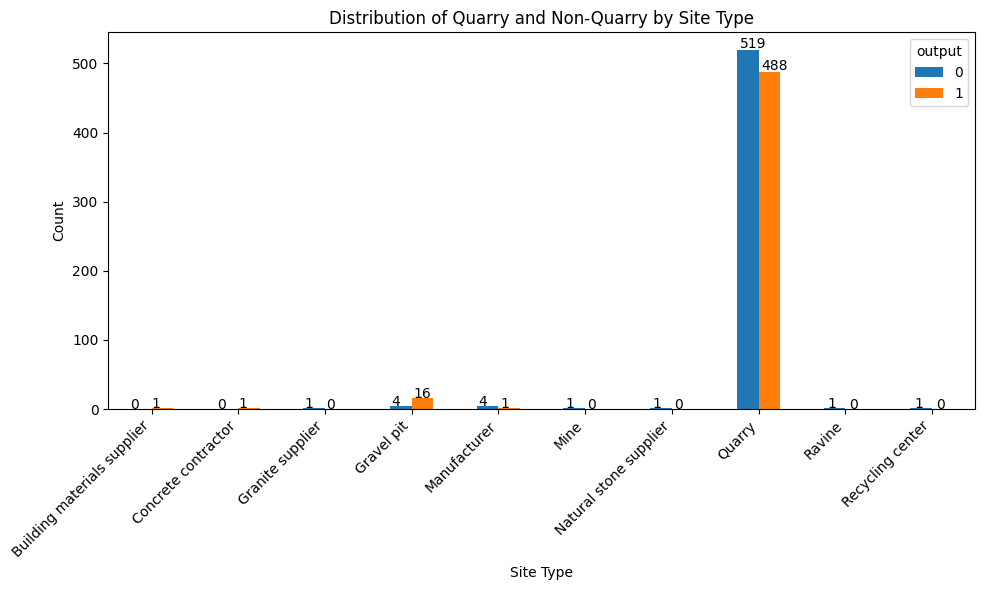

In [72]:
import matplotlib.pyplot as plt

# Grouping the data by 'site_type' and 'output' to get counts of each
site_type_counts = x_train_with_y.groupby(['site_type', 'output']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
ax = site_type_counts.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Distribution of Quarry and Non-Quarry by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
